Synthetic Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import json
import numpy as np

In [3]:
# Load the data
with open('discharge_summaries.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [7]:
print(df.head())

  patient_id  age  gender admission_date discharge_date  \
0        001   84    Male     2025-02-03     2025-02-12   
1        002   41  Female     2025-03-23     2025-04-02   
2        003   63    Male     2024-12-19     2024-12-25   
3        004   46    Male     2025-02-03     2025-02-09   
4        005   41    Male     2024-12-22     2024-12-30   

             primary_diagnosis  \
0                       Sepsis   
1       Hypertensive Emergency   
2  Acute Myocardial Infarction   
3     Type 2 Diabetes Mellitus   
4     Type 2 Diabetes Mellitus   

                                          procedures  \
0  [Blood Cultures, IV Antibiotics, Fluid Resusci...   
1  [IV Antihypertensives, Blood Pressure Monitoring]   
2  [Coronary Angioplasty, ECG, Cardiac Enzymes Test]   
3        [Blood Glucose Monitoring, Insulin Therapy]   
4        [Blood Glucose Monitoring, Insulin Therapy]   

                             medications  \
0  [Vancomycin, Piperacillin-Tazobactam]   
1             [

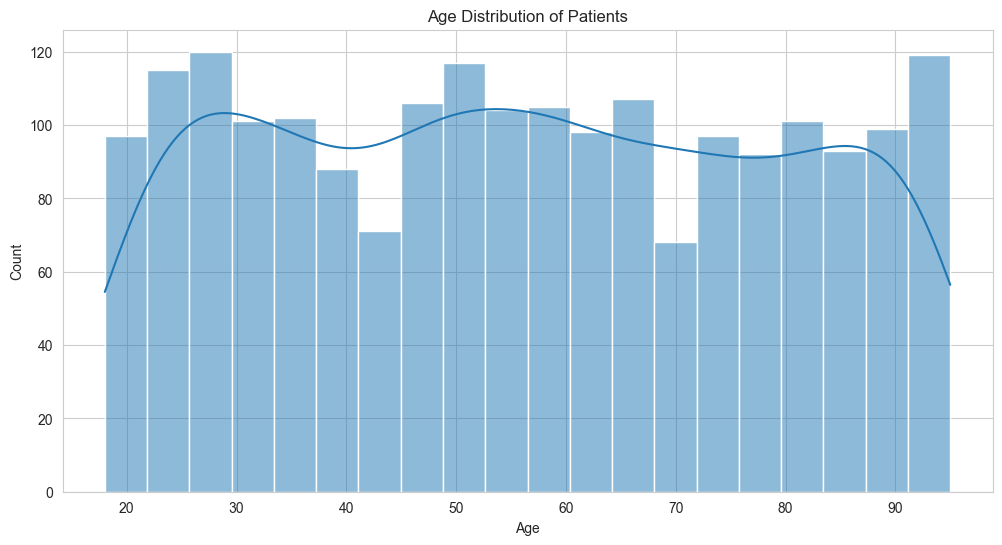

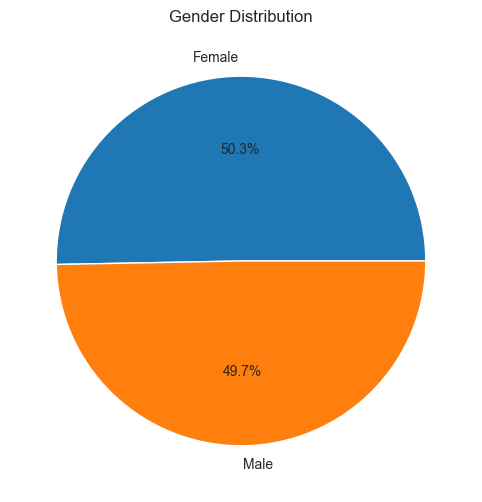

In [4]:
# Calculate length of stay
df['admission_date'] = pd.to_datetime(df['admission_date'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])
df['length_of_stay'] = (df['discharge_date'] - df['admission_date']).dt.days
df['admission_month'] = df['admission_date'].dt.month_name()

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Demographic Visualizations
# Age Distribution
plt.figure()
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender Distribution
gender_counts = df['gender'].value_counts()
plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

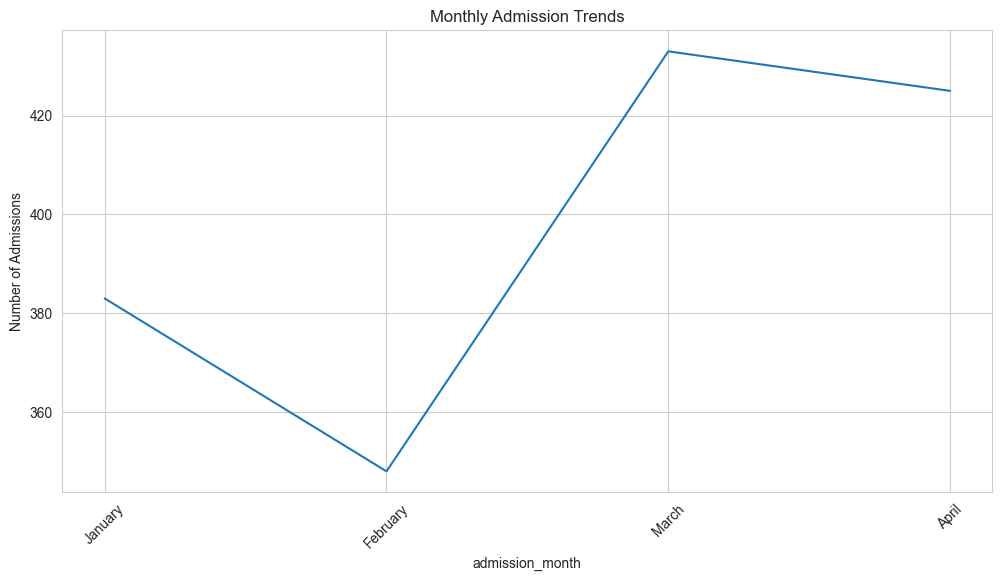

In [5]:
# 2. Temporal Visualizations
# Admission Trends by Month
month_order = ['January', 'February', 'March', 'April', 'December']
monthly_counts = df.groupby('admission_month').size().reindex(month_order)
plt.figure()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Monthly Admission Trends')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()

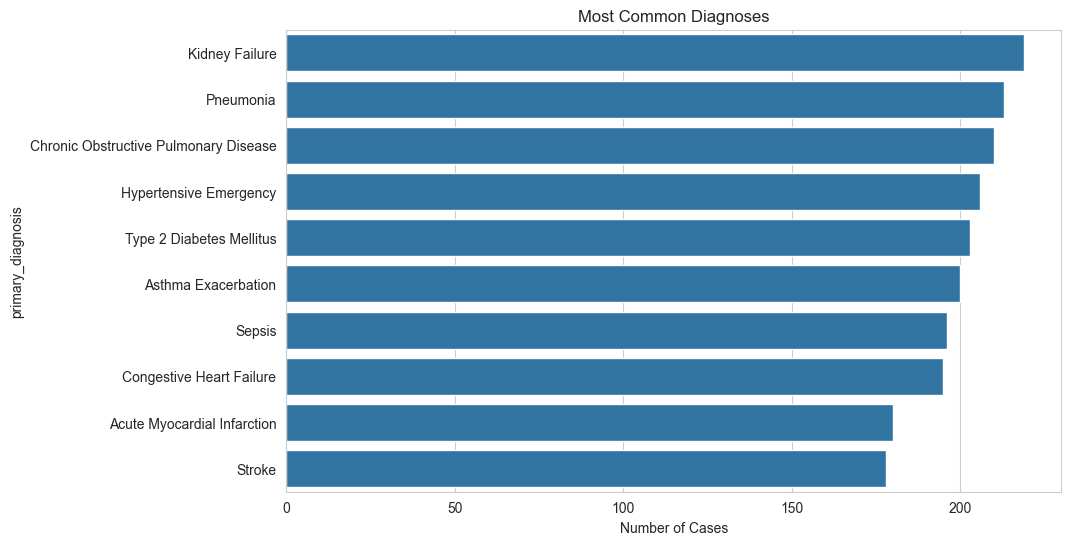

In [6]:
# 3. Diagnosis Analysis
# Top Diagnoses
plt.figure(figsize=(10, 6))
diagnosis_counts = df['primary_diagnosis'].value_counts()
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index)
plt.title('Most Common Diagnoses')
plt.xlabel('Number of Cases')
plt.show()

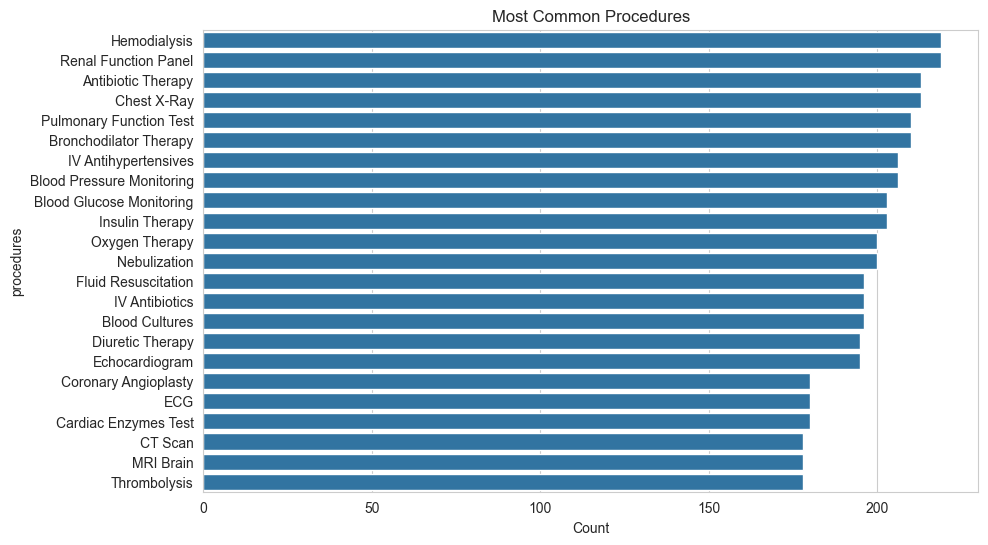


Top 10 Medications:
medications
Atorvastatin       358
Erythropoietin     219
Calcium Acetate    219
Ceftriaxone        213
Azithromycin       213
Albuterol          210
Tiotropium         210
Labetalol          206
Nitroglycerin      206
Metformin          203
Name: count, dtype: int64


In [7]:

# 4. Treatment Analysis
# Top Procedures
all_procedures = df.explode('procedures')['procedures'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=all_procedures.values, y=all_procedures.index)
plt.title('Most Common Procedures')
plt.xlabel('Count')
plt.show()

# Alternative to Wordcloud - Medication Frequency Table
print("\nTop 10 Medications:")
print(df.explode('medications')['medications'].value_counts().head(10))

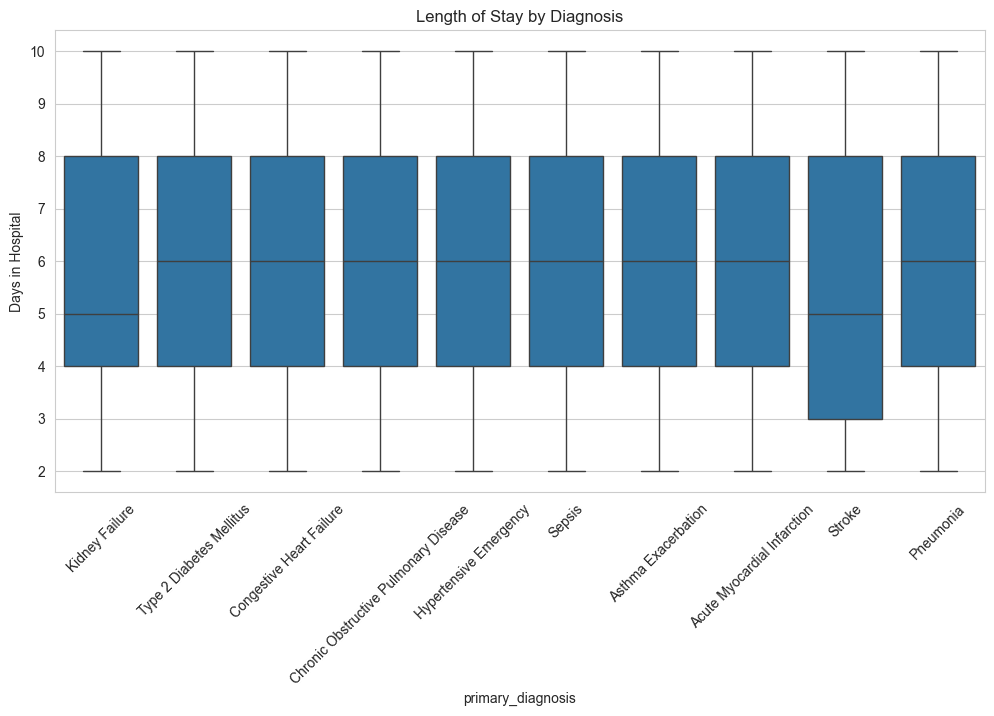

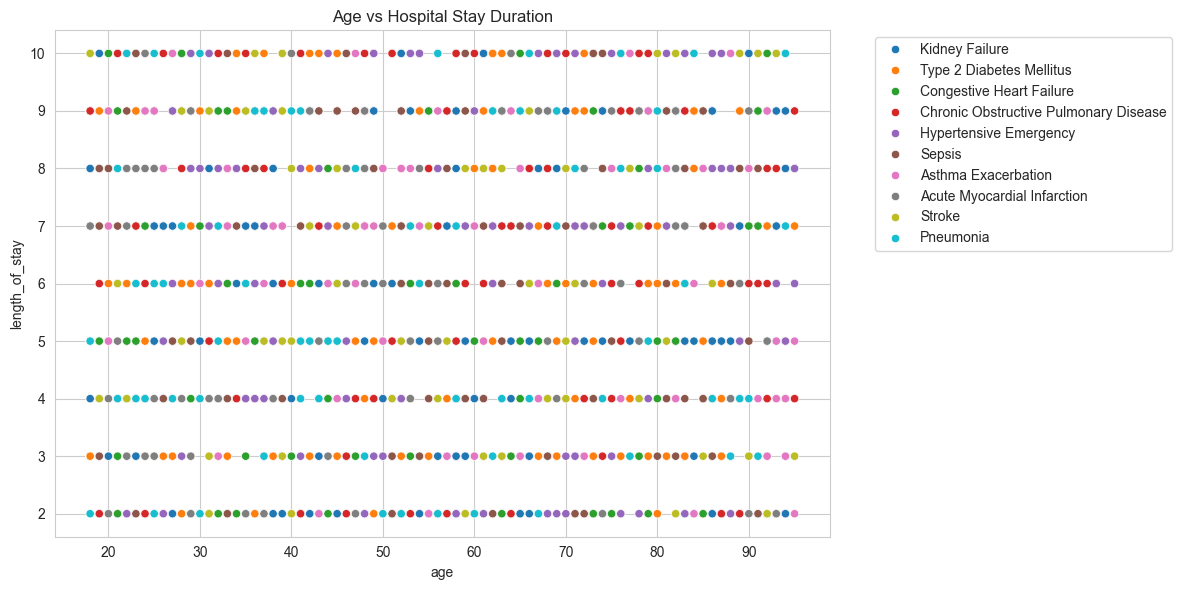

In [8]:
# 5. Advanced Visualizations
# Diagnosis vs Length of Stay
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='primary_diagnosis', y='length_of_stay')
plt.title('Length of Stay by Diagnosis')
plt.xticks(rotation=45)
plt.ylabel('Days in Hospital')
plt.show()

# Age vs Length of Stay by Diagnosis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='length_of_stay', hue='primary_diagnosis')
plt.title('Age vs Hospital Stay Duration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()